In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%load_ext autotime
%matplotlib inline

time: 10.6 ms (started: 2024-03-08 22:17:04 +05:30)


In [3]:
spam=pd.read_csv('spam.csv')
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

time: 13.6 ms (started: 2024-03-08 22:17:04 +05:30)


In [4]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


time: 10.6 ms (started: 2024-03-08 22:17:04 +05:30)


## Using Naive Bayes to classify as Spam or Ham

In [50]:
x_main=spam[['v2']]
y_main=spam[['v1']]

time: 2 ms (started: 2024-03-08 22:38:53 +05:30)


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_main.v2,y_main,test_size=0.25,random_state=1)


time: 3.96 ms (started: 2024-03-08 22:38:54 +05:30)


In [60]:
# https://www.geeksforgeeks.org/applying-multinomial-naive-bayes-to-nlp-problems/
# https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/

from sklearn.feature_extraction.text import CountVectorizer
cvt=CountVectorizer()
x_train_vect=cvt.fit_transform(x_train)
x_test_vect=cvt.transform(x_test)

time: 88.3 ms (started: 2024-03-08 22:39:29 +05:30)


In [61]:
x_train_vect

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55480 stored elements in Compressed Sparse Row format>

time: 1.73 ms (started: 2024-03-08 22:39:30 +05:30)


In [62]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train_vect,y_train)

MultinomialNB()

time: 10.7 ms (started: 2024-03-08 22:39:30 +05:30)


In [63]:
x_train_vect.shape

(4179, 7456)

time: 1.91 ms (started: 2024-03-08 22:39:31 +05:30)


In [64]:
x_test_vect.shape

(1393, 7456)

time: 1.55 ms (started: 2024-03-08 22:39:31 +05:30)


In [65]:
nb_pred=nb.predict(x_test_vect)

time: 1.15 ms (started: 2024-03-08 22:39:34 +05:30)


[[1205    8]
 [  12  168]]
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1213
        spam       0.95      0.93      0.94       180

    accuracy                           0.99      1393
   macro avg       0.97      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



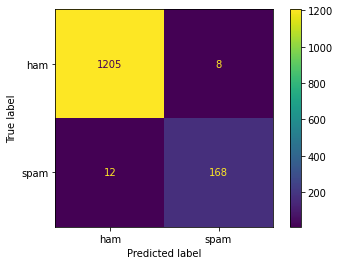

time: 183 ms (started: 2024-03-08 22:44:12 +05:30)


In [73]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
print(confusion_matrix(y_test,nb_pred))
print(classification_report(y_test,nb_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,nb_pred),display_labels=nb.classes_).plot()
